# EDA 2 

## Detailed EDA

In this notebook we are going to answer some business questions related to Data Analysis:

 What characteristics do the favourite articles have?

 What characteristics do the most revenue making articles have?

 What are the characteristics of most revenue making customers?
 
 What are the characteristics of  top 50k customers in terms of number of transactions?
 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sns
import plotly.express as px

## Loading the Data

In [2]:
transaction=pd.read_csv('C:/Users/molla/Capstone/transaction.csv')

In [3]:
#this article csv is the file that we saved after dropping the numerical columns 
Article=pd.read_csv('C:/Users/molla/Capstone/Article.csv')

In [4]:
customer=pd.read_csv('C:/Users/molla/Capstone/Submission/Customer_clean.csv')

In [53]:
customer.head()

,Unnamed: 0,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
0,0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,0.0,0.0,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...
1,1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,0.0,0.0,ACTIVE,NONE,25.0,2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...
2,2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,0.0,0.0,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
3,3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,0.0,0.0,ACTIVE,NONE,54.0,5d36574f52495e81f019b680c843c443bd343d5ca5b1c2...
4,4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,1.0,1.0,ACTIVE,Regularly,52.0,25fa5ddee9aac01b35208d01736e57942317d756b32ddd...


In [54]:
transaction.head()

,t_dat,customer_id,article_id,price,sales_channel_id
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492,2
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,0.015237,2
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687003,0.016932,2
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687004,0.016932,2


In [5]:
Article.head()

,Unnamed: 0,article_id,prod_name,product_type_name,product_group_name,graphical_appearance_name,colour_group_name,perceived_colour_value_name,perceived_colour_master_name,department_name,index_name,index_group_name,section_name,garment_group_name,detail_desc
0,0,108775015,Strap top,Vest top,Garment Upper body,Solid,Black,Dark,Black,Jersey Basic,Ladieswear,Ladieswear,Womens Everyday Basics,Jersey Basic,Jersey top with narrow shoulder straps.
1,1,108775044,Strap top,Vest top,Garment Upper body,Solid,White,Light,White,Jersey Basic,Ladieswear,Ladieswear,Womens Everyday Basics,Jersey Basic,Jersey top with narrow shoulder straps.
2,2,108775051,Strap top (1),Vest top,Garment Upper body,Stripe,Off White,Dusty Light,White,Jersey Basic,Ladieswear,Ladieswear,Womens Everyday Basics,Jersey Basic,Jersey top with narrow shoulder straps.
3,3,110065001,OP T-shirt (Idro),Bra,Underwear,Solid,Black,Dark,Black,Clean Lingerie,Lingeries/Tights,Ladieswear,Womens Lingerie,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."
4,4,110065002,OP T-shirt (Idro),Bra,Underwear,Solid,White,Light,White,Clean Lingerie,Lingeries/Tights,Ladieswear,Womens Lingerie,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."


# Business question:
## What characteristics do the favourite articles have?

# Top 10k most bought articles:

In [6]:
#group by transaction df by article id and calculating the size of each article id to find how many times it was bought
article_total=transaction.groupby('article_id').size().reset_index(name='Sold').sort_values(by=['Sold'],ascending=False).head(10000)


In [7]:
#sanity check
article_total.head(10)

,article_id,Sold
53832,706016001,42672
53833,706016002,30862
1711,372860001,29337
24808,610776002,25234
70124,759871002,23799
1712,372860002,22472
3706,464297007,21782
2233,399223001,19604
58427,720125001,18975
24807,610776001,18777


In [8]:
#calculating the purchase percentage overall
article_total['percent_of_total']=100*(article_total['Sold']/(article_total['Sold'].sum()))

In [58]:
#check
article_total.head()

,article_id,Sold,percent_of_total
53832,706016001,42672,0.148121
53833,706016002,30862,0.107127
1711,372860001,29337,0.101833
24808,610776002,25234,0.087591
70124,759871002,23799,0.082610


Now We will merge this file to the Article dataframe too see the characteristics.

In [9]:
#merge with article dataset
article_most_bought=pd.merge(article_total,Article, how='inner', on='article_id')

In [60]:
#check
article_most_bought.head(10)

,article_id,Sold,percent_of_total,Unnamed: 0,prod_name,product_type_name,product_group_name,graphical_appearance_name,colour_group_name,perceived_colour_value_name,perceived_colour_master_name,department_name,index_name,index_group_name,section_name,garment_group_name,detail_desc
0,706016001,42672,0.148121,53892,Jade HW Skinny Denim TRS,Trousers,Garment Lower body,Solid,Black,Dark,Black,Trousers,Divided,Divided,Divided Collection,Trousers,High-waisted jeans in washed superstretch deni...
1,706016002,30862,0.107127,53893,Jade HW Skinny Denim TRS,Trousers,Garment Lower body,Solid,Light Blue,Light,Blue,Trousers,Divided,Divided,Divided Collection,Trousers,High-waisted jeans in washed superstretch deni...
2,372860001,29337,0.101833,1713,7p Basic Shaftless,Socks,Socks & Tights,Solid,Black,Dark,Black,Shopbasket Socks,Lingeries/Tights,Ladieswear,"Womens Nightwear, Socks & Tigh",Socks and Tights,Fine-knit trainer socks in a soft cotton blend.
3,610776002,25234,0.087591,24837,Tilly (1),T-shirt,Garment Upper body,Solid,Black,Dark,Black,Jersey Basic,Ladieswear,Ladieswear,Womens Everyday Basics,Jersey Basic,T-shirt in lightweight jersey with a rounded h...
4,759871002,23799,0.082610,70221,Tilda tank,Vest top,Garment Upper body,Solid,Black,Dark,Black,EQ Divided Basics,Divided,Divided,Divided Complements Other,Jersey Basic,"Cropped, fitted top in cotton jersey with narr..."
5,372860002,22472,0.078004,1714,7p Basic Shaftless,Socks,Socks & Tights,Solid,White,Light,White,Shopbasket Socks,Lingeries/Tights,Ladieswear,"Womens Nightwear, Socks & Tigh",Socks and Tights,Fine-knit trainer socks in a soft cotton blend.
6,464297007,21782,0.075609,3711,Greta Thong Mynta Low 3p,Underwear bottom,Underwear,Placement print,Black,Dark,Black,Casual Lingerie,Lingeries/Tights,Ladieswear,Womens Lingerie,"Under-, Nightwear",Thong briefs in cotton jersey with a wide lace...
7,399223001,19604,0.068048,2236,Curvy Jeggings HW Ankle,Trousers,Garment Lower body,Solid,Black,Dark,Black,Denim Trousers,Divided,Divided,Ladies Denim,Trousers Denim,"Jeggings in washed, superstretch denim with a ..."
8,720125001,18975,0.065865,58491,SUPREME RW tights,Leggings/Tights,Garment Lower body,Solid,Black,Dark,Black,Ladies Sport Bottoms,Sport,Sport,Ladies H&M Sport,Jersey Fancy,Sports tights in fast-drying functional fabric...
9,610776001,18777,0.065178,24836,Tilly (1),T-shirt,Garment Upper body,Solid,White,Light,White,Jersey Basic,Ladieswear,Ladieswear,Womens Everyday Basics,Jersey Basic,T-shirt in lightweight jersey with a rounded h...


In [10]:
#drop the unnamed column
article_most_bought = article_most_bought.drop(columns=['Unnamed: 0'], axis=1)

In [11]:
#checking the columns
article_most_bought.columns

Index(['article_id', 'Sold', 'percent_of_total', 'prod_name',
       'product_type_name', 'product_group_name', 'graphical_appearance_name',
       'colour_group_name', 'perceived_colour_value_name',
       'perceived_colour_master_name', 'department_name', 'index_name',
       'index_group_name', 'section_name', 'garment_group_name',
       'detail_desc'],
      dtype='object')

In [12]:
#sanity check
article_most_bought.head()

,article_id,Sold,percent_of_total,prod_name,product_type_name,product_group_name,graphical_appearance_name,colour_group_name,perceived_colour_value_name,perceived_colour_master_name,department_name,index_name,index_group_name,section_name,garment_group_name,detail_desc
0,706016001,42672,0.250590,Jade HW Skinny Denim TRS,Trousers,Garment Lower body,Solid,Black,Dark,Black,Trousers,Divided,Divided,Divided Collection,Trousers,High-waisted jeans in washed superstretch deni...
1,706016002,30862,0.181236,Jade HW Skinny Denim TRS,Trousers,Garment Lower body,Solid,Light Blue,Light,Blue,Trousers,Divided,Divided,Divided Collection,Trousers,High-waisted jeans in washed superstretch deni...
2,372860001,29337,0.172280,7p Basic Shaftless,Socks,Socks & Tights,Solid,Black,Dark,Black,Shopbasket Socks,Lingeries/Tights,Ladieswear,"Womens Nightwear, Socks & Tigh",Socks and Tights,Fine-knit trainer socks in a soft cotton blend.
3,610776002,25234,0.148186,Tilly (1),T-shirt,Garment Upper body,Solid,Black,Dark,Black,Jersey Basic,Ladieswear,Ladieswear,Womens Everyday Basics,Jersey Basic,T-shirt in lightweight jersey with a rounded h...
4,759871002,23799,0.139759,Tilda tank,Vest top,Garment Upper body,Solid,Black,Dark,Black,EQ Divided Basics,Divided,Divided,Divided Complements Other,Jersey Basic,"Cropped, fitted top in cotton jersey with narr..."


Now to look into characteristics we will group these article by prod_name', 'product_type_name',
       'product_group_name', 'graphical_appearance_name', 'colour_group_name',
       'perceived_colour_value_name', 'perceived_colour_master_name',
       'department_name', 'index_name', 'index_group_name', 'section_name' and 
       'garment_group_name'to see the detailed characteristics of the top 10k most bought articles.

In [13]:
#make a for loop for grouping by these columns each time and show the percentage of sold
columns=['prod_name', 'product_type_name',
       'product_group_name', 'graphical_appearance_name', 'colour_group_name',
       'perceived_colour_value_name', 'perceived_colour_master_name',
       'department_name', 'index_name', 'index_group_name', 'section_name',
       'garment_group_name']

for i in columns:
    print(article_most_bought.groupby([i]).sum('percent_of_total').sort_values(by=['percent_of_total'],ascending=False).head(10))
  

                              article_id    Sold  percent_of_total
prod_name                                                         
Jade HW Skinny Denim TRS     11296256329  146217          0.858653
Luna skinny RW               17429597113  124945          0.733734
Timeless Midrise Brief       16188661186  100431          0.589777
Tilly (1)                    13437073103   90150          0.529402
Cat Tee.                     16502270722   72977          0.428554
Simple as That Triangle Top  10947344301   64771          0.380365
Shake it in Balconette       17166269669   61052          0.358525
Despacito                    27591126883   58602          0.344138
Tilda tank                    7598710132   58192          0.341730
Pluto RW slacks (1)          15780891551   57346          0.336762
                     article_id     Sold  percent_of_total
product_type_name                                         
Trousers           832857673157  2578539         15.142362
Sweater            

We found out that 15% of these articles are trousers product type, 71% of them are from Ladieswear index group.
people also like to buy black and dark items.

We will visualize these information on tableau to have better look.

attached tablea file:

***

# Business question:
## What characteristics do the most revenue making articles have?

# Top 10k most revenue making articles:

In [15]:
#this time group bu article ids but summing up the price to find the top 10 k

article_total_r=transaction.groupby('article_id')['price'].sum()\
                .reset_index().rename(columns={'price':'revenue'})\
                .sort_values(by=['revenue'],ascending=False).head(100000)

In [68]:
#check
article_total_r.head(10)

,article_id,revenue
53832,706016001,1382.011831
53833,706016002,999.628169
15980,568601006,814.209271
3087,448509014,651.939864
58427,720125001,615.029305
2233,399223001,607.259339
53834,706016003,606.382220
14232,562245046,569.206915
67435,751471001,510.226305
39502,661794001,488.090712


Reminder: These prices have been scaled because of h&m privacy reasons.

In [16]:
#merging with articles to see the characteristics of these articles

article_most_revenue=pd.merge(Article,article_total_r, how='inner', on='article_id')

In [70]:
article_most_revenue.to_csv('article_most_revenue.csv')

In [71]:
#check
article_most_revenue.head(10)

,Unnamed: 0,article_id,prod_name,product_type_name,product_group_name,graphical_appearance_name,colour_group_name,perceived_colour_value_name,perceived_colour_master_name,department_name,index_name,index_group_name,section_name,garment_group_name,detail_desc,revenue
0,0,108775015,Strap top,Vest top,Garment Upper body,Solid,Black,Dark,Black,Jersey Basic,Ladieswear,Ladieswear,Womens Everyday Basics,Jersey Basic,Jersey top with narrow shoulder straps.,61.101881
1,1,108775044,Strap top,Vest top,Garment Upper body,Solid,White,Light,White,Jersey Basic,Ladieswear,Ladieswear,Womens Everyday Basics,Jersey Basic,Jersey top with narrow shoulder straps.,45.855627
2,2,108775051,Strap top (1),Vest top,Garment Upper body,Stripe,Off White,Dusty Light,White,Jersey Basic,Ladieswear,Ladieswear,Womens Everyday Basics,Jersey Basic,Jersey top with narrow shoulder straps.,0.881797
3,3,110065001,OP T-shirt (Idro),Bra,Underwear,Solid,Black,Dark,Black,Clean Lingerie,Lingeries/Tights,Ladieswear,Womens Lingerie,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde...",19.694424
4,4,110065002,OP T-shirt (Idro),Bra,Underwear,Solid,White,Light,White,Clean Lingerie,Lingeries/Tights,Ladieswear,Womens Lingerie,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde...",8.718000
5,5,110065011,OP T-shirt (Idro),Bra,Underwear,Solid,Light Beige,Dusty Light,Beige,Clean Lingerie,Lingeries/Tights,Ladieswear,Womens Lingerie,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde...",18.825576
6,6,111565001,20 den 1p Stockings,Underwear Tights,Socks & Tights,Solid,Black,Dark,Black,Tights basic,Lingeries/Tights,Ladieswear,"Womens Nightwear, Socks & Tigh",Socks and Tights,"Semi shiny nylon stockings with a wide, reinfo...",29.403729
7,7,111565003,20 den 1p Stockings,Socks,Socks & Tights,Solid,Beige,Medium Dusty,Beige,Tights basic,Lingeries/Tights,Ladieswear,"Womens Nightwear, Socks & Tigh",Socks and Tights,"Semi shiny nylon stockings with a wide, reinfo...",0.338322
8,8,111586001,Shape Up 30 den 1p Tights,Leggings/Tights,Garment Lower body,Solid,Black,Dark,Black,Tights basic,Lingeries/Tights,Ladieswear,"Womens Nightwear, Socks & Tigh",Socks and Tights,Tights with built-in support to lift the botto...,127.154356
9,9,111593001,Support 40 den 1p Tights,Underwear Tights,Socks & Tights,Solid,Black,Dark,Black,Tights basic,Lingeries/Tights,Ladieswear,"Womens Nightwear, Socks & Tigh",Socks and Tights,"Semi shiny tights that shape the tummy, thighs...",126.537339


In [17]:
#adding the percentage of sales for each out of the whole sales
article_most_revenue['percent_of_total']=100*(article_most_revenue['revenue']/(article_most_revenue['revenue'].sum()))

In [18]:
#check
article_most_revenue.head(10)

,Unnamed: 0,article_id,prod_name,product_type_name,product_group_name,graphical_appearance_name,colour_group_name,perceived_colour_value_name,perceived_colour_master_name,department_name,index_name,index_group_name,section_name,garment_group_name,detail_desc,revenue,percent_of_total
0,0,108775015,Strap top,Vest top,Garment Upper body,Solid,Black,Dark,Black,Jersey Basic,Ladieswear,Ladieswear,Womens Everyday Basics,Jersey Basic,Jersey top with narrow shoulder straps.,61.101881,0.007648
1,1,108775044,Strap top,Vest top,Garment Upper body,Solid,White,Light,White,Jersey Basic,Ladieswear,Ladieswear,Womens Everyday Basics,Jersey Basic,Jersey top with narrow shoulder straps.,45.855627,0.005740
2,2,108775051,Strap top (1),Vest top,Garment Upper body,Stripe,Off White,Dusty Light,White,Jersey Basic,Ladieswear,Ladieswear,Womens Everyday Basics,Jersey Basic,Jersey top with narrow shoulder straps.,0.881797,0.000110
3,3,110065001,OP T-shirt (Idro),Bra,Underwear,Solid,Black,Dark,Black,Clean Lingerie,Lingeries/Tights,Ladieswear,Womens Lingerie,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde...",19.694424,0.002465
4,4,110065002,OP T-shirt (Idro),Bra,Underwear,Solid,White,Light,White,Clean Lingerie,Lingeries/Tights,Ladieswear,Womens Lingerie,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde...",8.718000,0.001091
5,5,110065011,OP T-shirt (Idro),Bra,Underwear,Solid,Light Beige,Dusty Light,Beige,Clean Lingerie,Lingeries/Tights,Ladieswear,Womens Lingerie,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde...",18.825576,0.002356
6,6,111565001,20 den 1p Stockings,Underwear Tights,Socks & Tights,Solid,Black,Dark,Black,Tights basic,Lingeries/Tights,Ladieswear,"Womens Nightwear, Socks & Tigh",Socks and Tights,"Semi shiny nylon stockings with a wide, reinfo...",29.403729,0.003681
7,7,111565003,20 den 1p Stockings,Socks,Socks & Tights,Solid,Beige,Medium Dusty,Beige,Tights basic,Lingeries/Tights,Ladieswear,"Womens Nightwear, Socks & Tigh",Socks and Tights,"Semi shiny nylon stockings with a wide, reinfo...",0.338322,0.000042
8,8,111586001,Shape Up 30 den 1p Tights,Leggings/Tights,Garment Lower body,Solid,Black,Dark,Black,Tights basic,Lingeries/Tights,Ladieswear,"Womens Nightwear, Socks & Tigh",Socks and Tights,Tights with built-in support to lift the botto...,127.154356,0.015916
9,9,111593001,Support 40 den 1p Tights,Underwear Tights,Socks & Tights,Solid,Black,Dark,Black,Tights basic,Lingeries/Tights,Ladieswear,"Womens Nightwear, Socks & Tigh",Socks and Tights,"Semi shiny tights that shape the tummy, thighs...",126.537339,0.015839


In [19]:
article_most_revenue=article_most_revenue.drop(columns=['Unnamed: 0'], axis=1)

In [70]:
#make a for loop for grouping by these columns each time and show the percentage of sales amount in total price

columns=['prod_name', 'product_type_name',
       'product_group_name', 'graphical_appearance_name', 'colour_group_name',
       'perceived_colour_value_name', 'perceived_colour_master_name',
       'department_name', 'index_name', 'index_group_name', 'section_name',
       'garment_group_name']

for i in columns:
    print(article_most_revenue.groupby([i]).sum('percent_of_total').sort_values(by=['percent_of_total'],ascending=False).head(10))
  

                             article_id      revenue  percent_of_total
prod_name                                                             
Jade HW Skinny Denim TRS    13414304494  4723.987525          0.591313
Luna skinny RW              19116332439  3675.861203          0.460117
Shaping Skinny H.W           5588814344  2452.273119          0.306957
Pluto RW slacks (1)         16532362587  1838.812898          0.230169
Mariette Blazer              6254611323  1836.389136          0.229865
SUPREME RW tights           17225170480  1723.181915          0.215695
Push Up Jegging L.W          7896360166  1662.542169          0.208105
Embrace S.Skinny Ankle H.W   8940152275  1623.020559          0.203158
Perrie Slim Mom Denim TRS    7624653368  1614.320441          0.202069
Timeless Midrise Brief      17987401288  1581.853559          0.198005
                      article_id        revenue  percent_of_total
product_type_name                                                
Trousers        

                        article_id        revenue  percent_of_total
garment_group_name                                                 
Jersey Fancy        14397727509667  112384.375610         14.067436
Trousers             4543253708730   89941.967966         11.258263
Knitwear             4993131860699   72389.140797          9.061131
Dresses Ladies       3447391053593   69299.531322          8.674397
Blouses              4142124966809   65077.020915          8.145855
Under-, Nightwear    4690816689699   58236.164915          7.289568
Swimwear             1865028437430   47749.232237          5.976892
Jersey Basic         4913750719657   45584.173746          5.705886
Trousers Denim       2107303446361   45343.688695          5.675784
Outdoor              3067104163928   45239.833102          5.662784


We get almost the same results as the top 10k favourite articles but this time these shows the top 10k most revenue making article: Ladieswear, women everyday collection and trousers are the top among their categories for the most revenue making articles. Stiil black and dark items bring more sales money for the company.

***

***

# Looking into Customers:

# Business Question:
## What are the characteristics of most revenue making customers?

In [23]:
#grouping by the customers ids and summing the price to see the total price they bought and looking into top 50k
customer_revenue=transaction.groupby('customer_id')['price'].sum().reset_index()\
                .rename(columns={'price':'revenue'}).sort_values(by=['revenue'],ascending=False).head(50000)

In [24]:
#defining age ranges to categorize customers into different age groups

age_bins = [15,25,35,45,55,65,100]

#changing the age to the labels which we defined in the customers dataframe
customer['age'] = pd.cut(customer['age'], bins=age_bins, labels=['Below 25','25-35','36-45','46-55', '56-65', 'Above 65'])

In [25]:
#sanity check
customer_revenue.head()

,customer_id,revenue
1011710,be1981ab818cf4ef6765b2ecaea7a2cbf14ccd6e8a7ee9...,49.361407
885174,a65f77281a528bf5c1e9f270141d601d116e1df33bf9df...,49.204593
962395,b4db5e5259234574edfff958e170fe3a5e13b6f146752c...,44.203220
1090960,cd04ec2726dd58a8c753e0d6423e57716fd9ebcf2f14ed...,40.579034
133564,191071b0e1f2e94a557f1a0b4cea3de55faf1581b1f464...,40.490186


In [26]:
#merging the customer sataframe to the customers revenue df that shows the top revenue making customers
customer_most_revenue=pd.merge(customer_revenue,customer, how='inner', on='customer_id')

In [27]:
#saving it to a csv file
customer_most_revenue.to_csv('customer_most_revenue.csv')

In [28]:
#check
customer_most_revenue.head()

,customer_id,revenue,Unnamed: 0,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
0,be1981ab818cf4ef6765b2ecaea7a2cbf14ccd6e8a7ee9...,49.361407,1018839,0.0,0.0,ACTIVE,NONE,25-35,67851f0456e7070c20c713fe0f47eb15bcbf2a59d13b79...
1,a65f77281a528bf5c1e9f270141d601d116e1df33bf9df...,49.204593,891429,1.0,1.0,ACTIVE,Regularly,56-65,c46e53a04e81a44fecaf0ec64ae353bfb3abc91f510e79...
2,b4db5e5259234574edfff958e170fe3a5e13b6f146752c...,44.203220,969180,1.0,1.0,ACTIVE,Regularly,Below 25,4acdec769091cb0bc94cfd3324843156dbc572a7281ae4...
3,cd04ec2726dd58a8c753e0d6423e57716fd9ebcf2f14ed...,40.579034,1098652,1.0,1.0,ACTIVE,Regularly,Above 65,771dc009c1a3bab320696643c3396319f1b1dd67ee9de7...
4,191071b0e1f2e94a557f1a0b4cea3de55faf1581b1f464...,40.490186,134476,1.0,1.0,ACTIVE,Regularly,46-55,547f17b60bc1685cc0ff69e7260e6bea1ec281fa51d163...


In [29]:
#dropping the unused cilumn like postal code
customer_most_revenue.drop(columns=['postal_code'], axis=1)

,customer_id,revenue,Unnamed: 0,FN,Active,club_member_status,fashion_news_frequency,age
0,be1981ab818cf4ef6765b2ecaea7a2cbf14ccd6e8a7ee9...,49.361407,1018839,0.0,0.0,ACTIVE,NONE,25-35
1,a65f77281a528bf5c1e9f270141d601d116e1df33bf9df...,49.204593,891429,1.0,1.0,ACTIVE,Regularly,56-65
2,b4db5e5259234574edfff958e170fe3a5e13b6f146752c...,44.203220,969180,1.0,1.0,ACTIVE,Regularly,Below 25
3,cd04ec2726dd58a8c753e0d6423e57716fd9ebcf2f14ed...,40.579034,1098652,1.0,1.0,ACTIVE,Regularly,Above 65
4,191071b0e1f2e94a557f1a0b4cea3de55faf1581b1f464...,40.490186,134476,1.0,1.0,ACTIVE,Regularly,46-55
...,...,...,...,...,...,...,...,...
49995,b71fb083cd70fe6e01384ee47bd0c15684472e62b86ccc...,2.748610,981596,0.0,0.0,ACTIVE,NONE,46-55
49996,3b361c7b3bd7139ff07626beb7a75db5ecabbe220a4c10...,2.748593,316823,1.0,1.0,ACTIVE,Regularly,Below 25
49997,cc3b46dedbc458da0d34e609e8adb11eb395e5ed5444b9...,2.748559,1094459,1.0,0.0,ACTIVE,Regularly,Below 25
49998,afa828e65097481fde253f38a725bf6960c29ad367d75d...,2.748559,941425,1.0,1.0,ACTIVE,Regularly,Below 25


In [30]:
customer_most_revenue.to_csv('Customers2.csv')

In [31]:
#now we can axmine the age labels in this dataframe by grouping by the age column
age_customers=customer_most_revenue.groupby('age').size().reset_index()

In [32]:
#check
age_customers

,age,0
0,Below 25,8923
1,25-35,19595
2,36-45,6927
3,46-55,10040
4,56-65,3889
5,Above 65,626


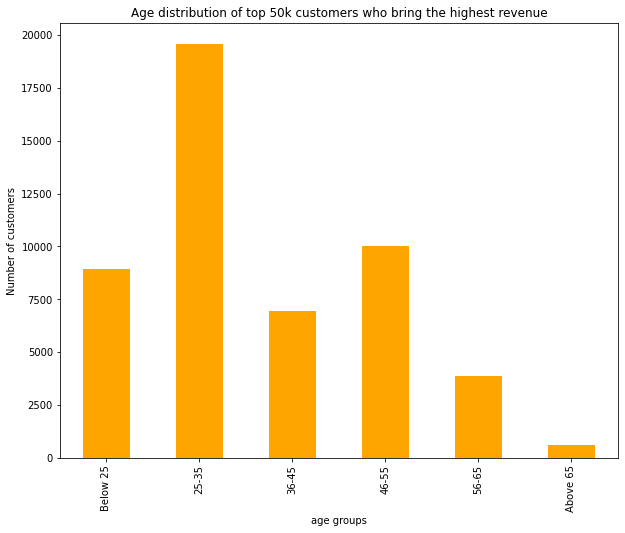

In [69]:
plt.figure(figsize=(10,8))

#grouping by the age in the top 50k revenue making customers dataframe
customer_most_revenue.groupby('age').size().plot(kind='bar', color='orange')

#labels
plt.xlabel('age groups')
plt.ylabel('Number of customers')

#title
plt.title('Age distribution of top 50k customers who bring the highest revenue')

plt.show()

# Figure 1:

The first and most important  group are customers between 25 and 35 year old, while the above 65 people are the smallest group.

In [34]:
#export this csv as a result
age_customers.to_csv('age_customers.csv')

# Frequent customers:

# Business Question:
## What are the characteristics of  top 50k customers in terms of number of transactions?

In [36]:
#grouping by customer id and calculating the size of transactions
customer_most_b=transaction.groupby('customer_id').size().reset_index(name='Sold').\
                    sort_values(by=['Sold'],ascending=False).head(50000)

In [37]:
#check
customer_most_b

,customer_id,Sold
1011710,be1981ab818cf4ef6765b2ecaea7a2cbf14ccd6e8a7ee9...,1641
962395,b4db5e5259234574edfff958e170fe3a5e13b6f146752c...,1321
885174,a65f77281a528bf5c1e9f270141d601d116e1df33bf9df...,1304
391840,49beaacac0c7801c2ce2d189efe525fe80b5d37e46ed05...,1233
1090960,cd04ec2726dd58a8c753e0d6423e57716fd9ebcf2f14ed...,1217
...,...,...
1342968,fc5a5a73f7ed104f338bd70f28d486ce8412a75b74730e...,96
386137,48b169cd5e896332addbb25f2291bb6ec3526a09c7c6d7...,96
971557,b6880ff593877752c645dbd8a55a0c8eb0e560a99e832d...,96
1142025,d68ffed37a2edbfe1686419aeb59e0012258bacd0a928d...,96


In [38]:
#merge it with customers df to see the characteristics
customer_most_bought=pd.merge(customer_most_b,customer, how='inner', on='customer_id')

In [39]:
customer_most_bought.head()

,customer_id,Sold,Unnamed: 0,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
0,be1981ab818cf4ef6765b2ecaea7a2cbf14ccd6e8a7ee9...,1641,1018839,0.0,0.0,ACTIVE,NONE,25-35,67851f0456e7070c20c713fe0f47eb15bcbf2a59d13b79...
1,b4db5e5259234574edfff958e170fe3a5e13b6f146752c...,1321,969180,1.0,1.0,ACTIVE,Regularly,Below 25,4acdec769091cb0bc94cfd3324843156dbc572a7281ae4...
2,a65f77281a528bf5c1e9f270141d601d116e1df33bf9df...,1304,891429,1.0,1.0,ACTIVE,Regularly,56-65,c46e53a04e81a44fecaf0ec64ae353bfb3abc91f510e79...
3,49beaacac0c7801c2ce2d189efe525fe80b5d37e46ed05...,1233,394603,0.0,0.0,ACTIVE,NONE,25-35,ab724d6cb2340bd9c5294fd7f2811349f6509a27a8bc5c...
4,cd04ec2726dd58a8c753e0d6423e57716fd9ebcf2f14ed...,1217,1098652,1.0,1.0,ACTIVE,Regularly,Above 65,771dc009c1a3bab320696643c3396319f1b1dd67ee9de7...


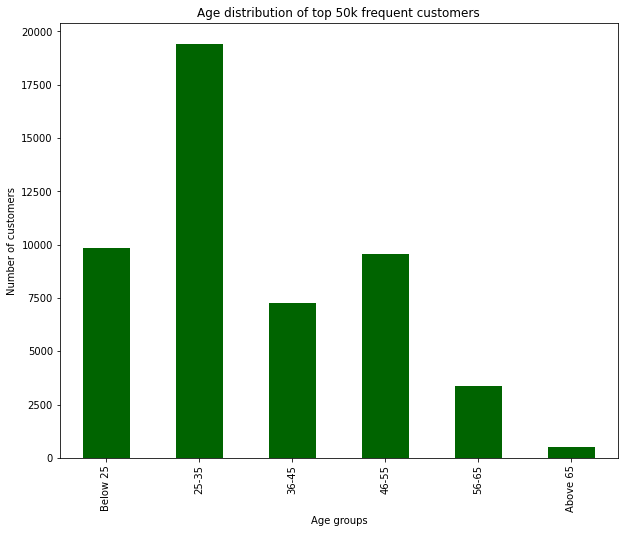

In [48]:
plt.figure(figsize=(10,8))
customer_most_bought.groupby('age').size().plot(kind='bar', color='darkgreen')

#labels
plt.xlabel('Age groups')
plt.ylabel('Number of customers')

#title
plt.title('Age distribution of top 50k frequent customers')

plt.show()

# Figure 2:

Still 25-35 age group contains the highest number of frequent customers among top 50k customers.

## What if we look into all customers?

In [59]:
#after grouping by we do not use head this time
customers_groups=transaction.groupby('customer_id').size().reset_index(name='Number of purchase')

In [60]:
customers_groups

,customer_id,Number of purchase
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,19
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,78
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,15
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,2
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,13
...,...,...
1362276,ffffbbf78b6eaac697a8a5dfbfd2bfa8113ee5b403e474...,45
1362277,ffffcd5046a6143d29a04fb8c424ce494a76e5cdf4fab5...,82
1362278,ffffcf35913a0bee60e8741cb2b4e78b8a98ee5ff2e6a1...,43
1362279,ffffd7744cebcf3aca44ae7049d2a94b87074c3d4ffe38...,7


In [61]:
customer_age_groups=pd.merge(customers_groups,customer, how='inner', on='customer_id')

In [62]:
customer_age_groups

,customer_id,Number of purchase,Unnamed: 0,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,19,0,0.0,0.0,ACTIVE,NONE,46-55,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,78,1,0.0,0.0,ACTIVE,NONE,Below 25,2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,15,2,0.0,0.0,ACTIVE,NONE,Below 25,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,2,3,0.0,0.0,ACTIVE,NONE,46-55,5d36574f52495e81f019b680c843c443bd343d5ca5b1c2...
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,13,4,1.0,1.0,ACTIVE,Regularly,46-55,25fa5ddee9aac01b35208d01736e57942317d756b32ddd...
...,...,...,...,...,...,...,...,...,...
1362276,ffffbbf78b6eaac697a8a5dfbfd2bfa8113ee5b403e474...,45,1371975,0.0,0.0,ACTIVE,NONE,Below 25,7aa399f7e669990daba2d92c577b52237380662f36480b...
1362277,ffffcd5046a6143d29a04fb8c424ce494a76e5cdf4fab5...,82,1371976,0.0,0.0,ACTIVE,NONE,Below 25,3f47f1279beb72215f4de557d950e0bfa73789d24acb5e...
1362278,ffffcf35913a0bee60e8741cb2b4e78b8a98ee5ff2e6a1...,43,1371977,1.0,1.0,ACTIVE,Regularly,Below 25,4563fc79215672cd6a863f2b4bf56b8f898f2d96ed590e...
1362279,ffffd7744cebcf3aca44ae7049d2a94b87074c3d4ffe38...,7,1371978,1.0,1.0,ACTIVE,Regularly,Below 25,8892c18e9bc3dca6aa4000cb8094fc4b51ee8db2ed14d7...


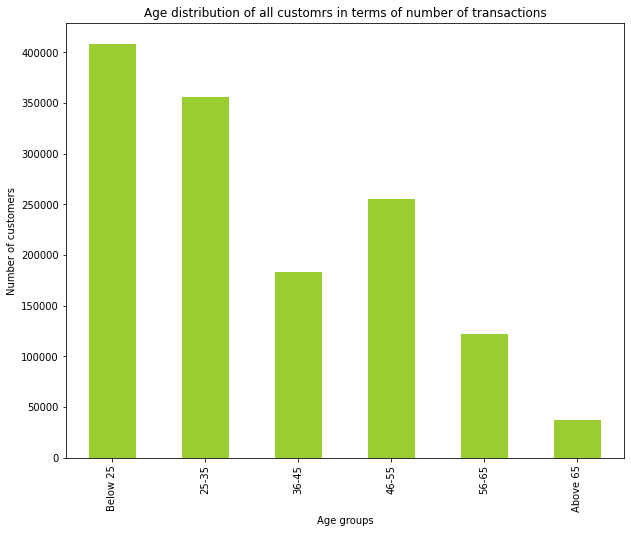

In [68]:
plt.figure(figsize=(10,8))

customer_age_groups.groupby('age').size().plot(kind='bar', color='yellowgreen')

#labels
plt.xlabel('Age groups')
plt.ylabel('Number of customers')

#title
plt.title('Age distribution of all customrs in terms of number of transactions')

plt.show()

# Figure 3:

By looking at all customers in terms of number of purchase we figured that the largest group of customers are customers with the age below 25.

Conclusions:
By looking into top 10k  bought articles, We found out that 15% of these articles are trousers product type, 71% of them are from Ladieswear index group.
people also like to buy black and dark items.


We get almost the same results as the top 10k favourite articles but this time these shows the top 10k most revenue making article: Ladieswear, women everyday collection and trousers are the top among their categories for the most revenue making articles. Stiil black and dark items bring more sales money for the company.


The first and most important  group of customers who bring the highest revenue are customers between 25 and 35 year old, while the above 65 people are the smallest group.
